In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

In [2]:
data_df = pd.read_csv('titanic.csv')
data_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 1. 결측치 채우기
- Embarked : 가장 많은 S로 빈칸 채우기
- Age : 결측치는 평균 값으로 대체 -> Appellication값 채워지면 진행
- Cabin : 결측치를 N으로 채우기

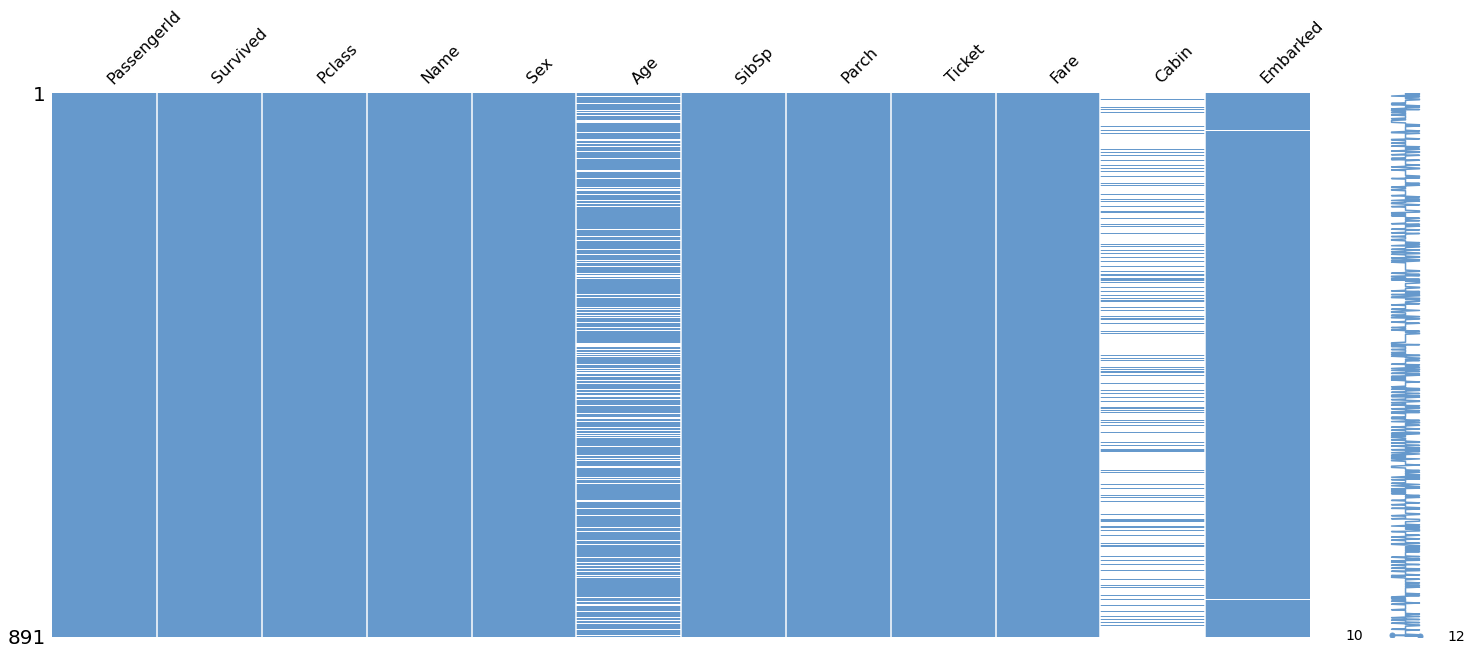

In [3]:
df = data_df.copy()

#### 1) 항구 :  가장 많은 S로 빈칸 채우기
- Embarked는 2개의 아주 작은 결측치를 가지고 있어 가장 많은 S로 빈칸 채움.


In [4]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
# 항구 :  가장 많은 S로 빈칸 채우기
df.Embarked = df.Embarked.fillna('S')
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### 2) Cabin 
- 결측치는 'N'으로 처리 

In [6]:
(df[df.Cabin.notnull()].Survived.value_counts(sort = False)) / len(df[df.Cabin.notnull()])*100

0    33.333333
1    66.666667
Name: Survived, dtype: float64

In [7]:
(df[df.Cabin.isnull()].Survived.value_counts()) / len(df[df.Cabin.isnull()]) * 100

0    70.014556
1    29.985444
Name: Survived, dtype: float64

In [8]:
df.Cabin = df.Cabin.fillna('N')
df.Cabin = df.Cabin.apply(lambda x : str(x)[:1])
df = df.replace({'Cabin' : ['N','T']}, 0)
df = df.replace({'Cabin' : ['C','G','A','F']}, 1)
df = df.replace({'Cabin' : ['E','D','B']}, 2)
df.Cabin.value_counts()

0    688
2    112
1     91
Name: Cabin, dtype: int64

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

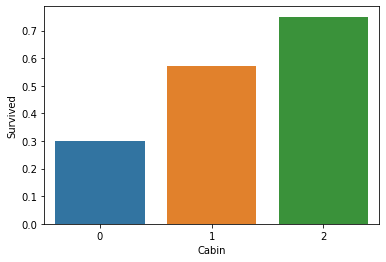

In [9]:
sns.barplot(x = 'Cabin', y = 'Survived', data = df, ci = None)

## 1. 범주형 변수 변환
- Sex : Female = 1, Male = 0
- Pclass  / Embarked / Cabin: One-hot Encoding

#### 1) 'Sex' : Female = 1, Male = 0

In [10]:
# Sex : Female = 1, Male = 0
df['Sex'] = df['Sex'].apply(lambda x : 1 if x == 'female' else 0)
df['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

#### 2) 'Pclass', 'Embarked', 'Cabin : One-hot Encoding

In [11]:
pd.options.display.max_columns = 100
df = pd.get_dummies(df, columns = ['Pclass','Embarked','Cabin'])

#### 3) 범주형 변수 변환 결과물

In [12]:
df

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Cabin_0,Cabin_1,Cabin_2
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,1,0,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,0,0,0,1,0,1,0
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0,1,0,0,0,1,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,1,0,0,0,0,1,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,0,0,1,0,0,1,1,0,0
889,890,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,1,0,0,1,0,0,0,1,0


## 2. 파생 열 생성
- 'Appellation' 열 생성 : 성별 / 기혼 구분에 따라 Mr, Master, Ms, Mrs로 구분
- 'fellow' 열 생성 : Ticket열을 기준으로 티켓을 같이 구매한 동행 수
- 'Family' 열 생성 : SibSp와 Parch로 가족과의 동반여부 확인 

#### 1) Appellation  열 생성

`상위계층 - 귀족`

Countess: 백작부인  (상위층)

Lady : 여성 (상위층)

Jonkheer: 남성 어린 낮은 귀족 (상위층)

Sir : 작위 받은 남성 (상위층)

`상위계층 - 전문직, 군인`

Don: 옥스브리지 대학 강사 (상위층) or 돈키호테 할때 don, donna

Dr: doctor (상위층)

Rev: Reverend, Priest 신부님, 사제, 남성, (상위층)

Capt: 대위, captain (군인)

Col: 대령, colonel (군인)

Major: 소령 (군인)

`성별, 기혼 구분, 계층 구분 x`

Master: 18세 이전 어린 남성, Mr 전의 칭호 (계층 구분 x)

Miss : 결혼 전 여성 (계층 구분x)

Mlle: Mademoiselle == Miss 에 합쳐도 됨 (계층 구분 x)

Mme: Madam == Mrs 에 합쳐도 됨 (계층 구분 x)

Mr: 남성 (계층 구분 x)

Mrs: 결혼 후 여성 (계층 구분 x)

Ms: 결혼 전 여성 (계층 구분 x)

In [13]:
df['Appellation'] = df.Name.apply(lambda x : x.split(',')[1].split('.')[0])
df.Appellation = df.Appellation.apply(lambda x : str.strip(x))

# Appellation 전처리
df = df.replace({'Appellation' : ['Dr','Rev','Major','Col','Capt','Sir','Don','Jonkheer']}, 'Mr')
df = df.replace({'Appellation' : ['Lady','Mme','the Countess']}, 'Mrs')
df = df.replace({'Appellation' : ['Mlle','Ms']}, 'Miss')

In [14]:
df.head(3)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Cabin_0,Cabin_1,Cabin_2,Appellation
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1,1,0,0,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0,1,0,0,0,1,0,Mrs
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1,1,0,0,Miss


In [15]:
set(df.Appellation)

{'Master', 'Miss', 'Mr', 'Mrs'}

#### 2) 'Fellow' 열 생성
- 'Ticket' 열을 기준으로 같은 Ticket 값을 갖는 행들은 티켓을 같이 구매한 동행인이라 판단하여 'Fellow' 열 추가 

In [16]:
# 티켓을 같이 구매한 동행 수 구하기
ticket_count = dict(df.Ticket.value_counts())
df['Fellow'] = df.Ticket.apply(lambda x : ticket_count[x]) - 1

In [17]:
df.Fellow.value_counts()

0    547
1    188
2     63
3     44
6     21
5     18
4     10
Name: Fellow, dtype: int64

<AxesSubplot:xlabel='Fellow', ylabel='Survived'>

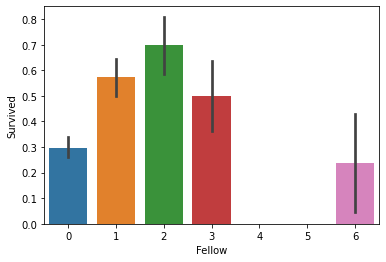

In [18]:
sns.barplot(x = 'Fellow', y = 'Survived', data = df)

#### 3) 'Family' 열 생성 
- SibSp와 Parch로 합하여 가족의 수 구함 
- 가족을 동반하지 않을 경우 자기 자신인 1로 값 정의

In [19]:
#SibSp와 Parch로 가족과의 동반여부를 알 수 있도록, 1 : 가족과 동반하지 않음
df['Family'] = df['SibSp'] + df['Parch'] + 1

#### 4) 'Breadwinner' 열 생성
- Breadwinner을 생성했으나 성능에 좋지 않은 영향을 주어 삭제 

In [20]:
# # 가장 넣기 위한 전처리 -> 아직 안됨
# data_df3['Breadwinner'] = 0

# for ticket, cnt in ticket_count.items():
#     if cnt > 1:
#         tmp_df = data_df3[data_df3.Ticket == ticket]
#         for x in tmp_df.iterrows():
#             if 25<= x[1].Age <= 35:
#                 data_df3.at[x[0],'Breadwinner'] = 1

In [21]:
# sns.barplot(x = 'Fellow', y = 'Survived', hue = 'Breadwinner',data = data_df3)

## 3. 열 제거
- PassengerId
- Name : 'Appellation' feature 생성 후 제거
- Ticket : 'Fellow' feature 생성 후 제거
- SibSp, Parch : Family feature 생성 후 제거

In [22]:
df.head(1)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Cabin_0,Cabin_1,Cabin_2,Appellation,Fellow,Family
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.25,0,0,1,0,0,1,1,0,0,Mr,0,2


In [23]:
df.drop(['PassengerId', 'Name', 'Ticket','SibSp','Parch'], axis = 1, inplace=True)

In [24]:
print(df.shape)
df.head(3)

(891, 16)


,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Cabin_0,Cabin_1,Cabin_2,Appellation,Fellow,Family
0,0,0,22.0,7.2500,0,0,1,0,0,1,1,0,0,Mr,0,2
1,1,1,38.0,71.2833,1,0,0,1,0,0,0,1,0,Mrs,0,2
2,1,1,26.0,7.9250,0,0,1,0,0,1,1,0,0,Miss,0,1


## 4. 데이터 분할

- Survived 와 그 외 데이터셋 분할 
- Appellation 열 더미변수로 생성

In [25]:
y = df.Survived
X = df.drop('Survived', axis = 1)

app_list = list(set(X.Appellation))

X = pd.get_dummies(X,columns=['Appellation'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 5. 나이 예측
train data에서 Appellation에 따른 나이 평균 구한 뒤
이를 test data에도 대입

In [27]:
appellation_list = ['Appellation_{}'.format(x) for x in app_list]

for app in appellation_list:
    tmp_mean = np.round(X_train[X_train[app] == 1].Age.mean(),2)
    X_train.loc[((X_train[app] == 1) & X_train.Age.isna()), 'Age'] = tmp_mean
    X_test.loc[((X_test[app] == 1) & X_test.Age.isna()), 'Age'] = tmp_mean

## 6.전처리 함수화

In [28]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

def preprocessing_df(data_df):
    df = data_df.copy()
    
    # Embarked :  가장 많은 S로 빈칸 채우기
    df.Embarked = df.Embarked.fillna('S')
    
    # Cabin : 결측치를 'N' 값으로 대체
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x : str(x)[:1])
    df = df.replace({'Cabin' : ['N','T']}, 0)
    df = df.replace({'Cabin' : ['C','G','A','F']}, 1)
    df = df.replace({'Cabin' : ['E','D','B']}, 2)
    
    # Sex : Female = 1, Male = 0
    df['Sex'] = df['Sex'].apply(lambda x : 1 if x == 'female' else 0)
    
    # Pclass, Embarked, Cabin -> One-hot encoding
    df = pd.get_dummies(df, columns = ['Pclass','Embarked','Cabin'])
    
    # 호칭 정리
    df['Appellation'] = df.Name.apply(lambda x : x.split(',')[1].split('.')[0])
    df.Appellation = df.Appellation.apply(lambda x : str.strip(x))
    
    # Appellation 전처리
    df = df.replace({'Appellation' : ['Dr','Rev','Major','Col','Capt','Sir','Don','Jonkheer']}, 'Mr')
    df = df.replace({'Appellation' : ['Lady','Mme','the Countess']}, 'Mrs')
    df = df.replace({'Appellation' : ['Mlle','Ms']}, 'Miss')
    
    # 티켓을 같이 구매한 동행 수 구하기
    ticket_count = dict(df.Ticket.value_counts())
    df['Fellow'] = df.Ticket.apply(lambda x : ticket_count[x]) - 1
    
    # SibSp와 Parch로 가족과의 동반여부를 알 수 있도록, 1 : 가족과 동반하지 않음
    df['Family'] = df['SibSp'] + df['Parch'] + 1
    
    # 필요없는 열 제거
    df.drop(['PassengerId', 'Name', 'Ticket','SibSp','Parch'], axis = 1, inplace=True)
    
    # X, y 데이터 분할
    y = df.Survived
    X = df.drop('Survived', axis = 1)
    
    # Appellation별 Age 평균을 구하기 위함
    app_list = list(set(X.Appellation))
    
    # Appellation one-hot encoding
    X = pd.get_dummies(X)
    
    # train - test 데이터셋 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    
    
    appellation_list = ['Appellation_{}'.format(x) for x in app_list]
    # Age를 Appellation별 평균으로 대체
    for app in appellation_list:
        tmp_mean = np.round(X_train[X_train[app] == 1].Age.mean(),2)
        X_train.loc[((X_train[app] == 1) & X_train.Age.isna()), 'Age'] = tmp_mean
        X_test.loc[((X_test[app] == 1) & X_test.Age.isna()), 'Age'] = tmp_mean
        
    return X_train, X_test, y_train, y_test

In [29]:
data_df = pd.read_csv('titanic.csv')

In [30]:
X_train, X_test, y_train, y_test = preprocessing_df(data_df)

In [31]:
print(X_train.shape)
X_train.head(3)

(712, 18)


,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Cabin_0,Cabin_1,Cabin_2,Fellow,Family,Appellation_Master,Appellation_Miss,Appellation_Mr,Appellation_Mrs
140,1,36.07,15.2458,0,0,1,1,0,0,1,0,0,1,3,0,0,0,1
439,0,31.00,10.5000,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0
817,0,31.00,37.0042,0,1,0,1,0,0,1,0,0,1,3,0,0,1,0


## 7. 예측 진행

### 모델 선택 기준
- sklearn에서 제공하는 아래 기준 참고 
- 분류 모델 & 라벨된 데이터 & 100,000 개 이하 데이터 & Linear SVC not working & Text data 아님 & KNeighbors Classifier not working
- 앙상블 분류 모델(GradientBoosting, XGBClassifier, 로짓회귀) 활용 

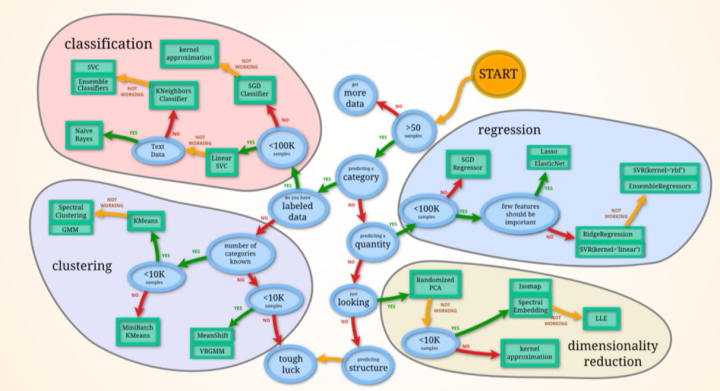

### 정확도 기준 성능 (하이퍼 파라미터 튜닝 안한 모델 기준)
- knn : 0.81
- Stacking : 0.82
- Linear SVC : 0.83
- LGBM : 0.8436
- LogisticRegression : 0.8436
- GradientBoostingClassifier :  0.8547
- XGBClassifier : 0.8771

::: 결론 : 기본 성능 기준 XGBClassifier 가 가장 높게 나와 해당 모델 선택 후 하이퍼파라미터 진행

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, f1_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import cross_val_score

def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)

    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

#### 숫자형 변수 스케일링
- min-max scaling 과 standardscaler 모두 적용 후 성능 차이가 크지 않아 standardscaler 로 선택해 적용

In [33]:
numeric_features = ['Age','Fare','Fellow','Family']

scaler = StandardScaler()

preprocessor = ColumnTransformer(
        [('num', scaler, numeric_features)],
        remainder='passthrough')

preprocessor.fit(X_train)
X_train_scaled = preprocessor.transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [34]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(X_train_scaled, y_train)

[14:43:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
pred = xgb_model.predict(X_test_scaled)
pred_proba = xgb_model.predict_proba(X_test_scaled)
get_clf_eval(y_test, pred)

오차행렬:
 [[101   9]
 [ 15  54]]

정확도: 0.8659
정밀도: 0.8571
재현율: 0.7826
F1: 0.8182
AUC: 0.8504


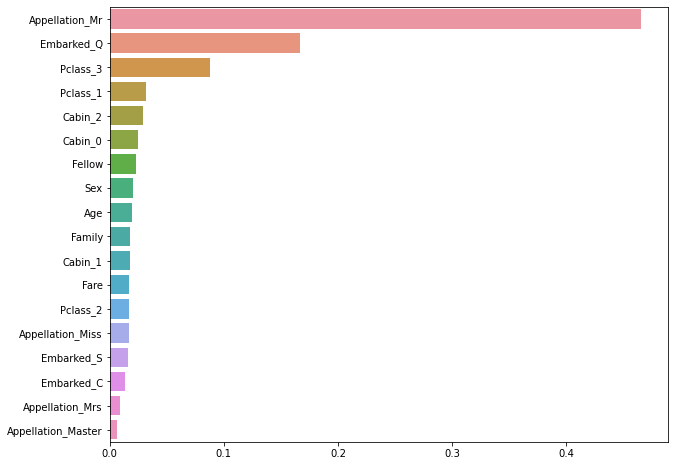

In [36]:
plt.figure(figsize = (10, 8))

imp = xgb_model.feature_importances_
imp_series = pd.Series(imp, index = X_train.columns)
imp_series = imp_series.sort_values(ascending=False)
sns.barplot(imp_series, y = imp_series.index)

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_est = XGBClassifier()

xgb_params = {
    'n_estimator' : [300, 400, 500],
    'learning_rates' : [0.1, 0.3, 0.5, 1, 10],
    'max_depth' : [3,4,5,6]
}

grid = GridSearchCV(estimator = xgb_est, param_grid = xgb_params, cv = 5)
grid.fit(X_train_scaled, y_train)

[14:44:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:44:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:44:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindi

[14:45:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:45:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindi

[14:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindi

[14:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindi

[14:45:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:45:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindi

[14:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:46:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:46:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindi

[14:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:47:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindi

[14:47:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:47:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:47:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindi

[14:47:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:47:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:47:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindi

[14:47:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:47:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:47:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindi

[14:48:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:48:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindi

[14:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:48:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindi

[14:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:48:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindi

[14:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "learning_rates", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:49:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
grid.best_params_

In [ ]:
pred = grid.predict(X_test_scaled)

get_clf_eval(y_test, pred)